# Exercise: XGBoost

In this exercise, we'll be exploring XGBoost and leveraging it on the same regression and classification problem as `Exercise: Linear Models`. This is useful as when are you faced with a new challenge, you often try many different models to see how they each perform on your problem space. XGBoost can be tuned in many different ways, so we'll stick with some of the simpler defaults.

You're tasked with completing the following steps:
1. Load in the wine dataset from scikit learn.
2. For the wine dataset, create a train and test split, 80% train / 20% test.
3. Load the train/test data into the xgboost matrix
4. Create a XGBoost Classifier model with these hyper parameters:
    1. max_depth: 5
    2. eta: 0.1
    3. objective: multi:softmax
    4. num_class: 3
    5. num_round: 100
5. Evaluate the model with the test dataset
6. Output the feature importance of the wine dataset
7. Load the diabetes dataset from scikit learn
8. For the Diabetes dataset, create a train and test split, 80% train / 20% test.
9. Load the train/test data into the xgboost matrix
10. Create a XGBoost Regression model model with these hyper parameters:
    1. max_depth: 2
    2. eta: 0.03
    3. gamma: 0.09
    4. colsample_bytree: 0.5
    5. objective: reg:squarederror
    6. num_round: 100
11. Evaluate the model with the test dataset
12. Output the feature importance of the diabetes dataset

## Setup

### Open up Sagemaker Studio

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (Data Science)`

In [1]:
# xgboost is not preinstalled so we'll need to install it manually
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

## XGBoost Classifier

In [3]:
# Load in the wine dataset
wine = datasets.load_wine()

In [4]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Include the target as well
df['target'] = wine.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
# Split your data with these ratios: train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df, test_size=0.2)

In [26]:
# Load your train/test dataframe into DMatrix
dtrain = xgb.DMatrix(df_train[wine.feature_names], label=df_train['target'])
dtest = xgb.DMatrix(df_test[wine.feature_names], label=df_test['target'])

In [27]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
params = { "objective": "multi:softmax", "num_class": 3, 
         "max_depth": 5, "eta":0.1, "num_round":100}
bst = xgb.train(params, dtrain)

[23:25:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1700181168148/work/src/learner.cc:767: 
Parameters: { "num_round" } are not used.



In [28]:
preds = bst.predict(dtest)

In [29]:
df_test['preds'] = preds.astype(int)

In [30]:
df_test.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,preds
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1,1
55,13.56,1.73,2.46,20.5,116.0,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120.0,0,0
107,12.72,1.75,2.28,22.5,84.0,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488.0,1,1
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0,0
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0,2,2


In [31]:
# Accuracy score using scikit learn function for classification metric
accuracy_score(df_test.target, df_test.preds)

0.9166666666666666

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

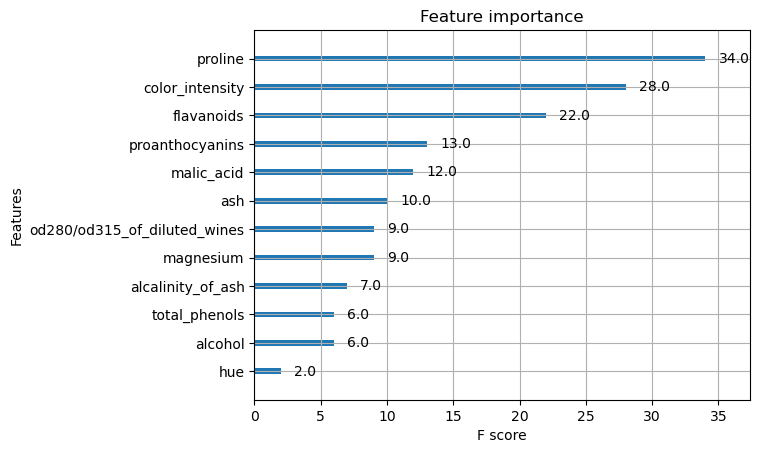

In [32]:
# Plot the importance of the features based on fitted trees
xgb.plot_importance(bst)

## XGBoost Regression

In [8]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [9]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Include the target as well
dfd['target'] = diabetes.target

In [10]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd, test_size=0.2)

In [11]:
# Load your train/test dataframe into DMatrix
dtrain = xgb.DMatrix(dfd_train[diabetes.feature_names], label=dfd_train.target)
dtest = xgb.DMatrix(dfd_test[diabetes.feature_names], label=dfd_test.target)

In [12]:
dfd_test.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,0.005710,0.001413,0.001799,0.000028,-0.004506,-0.001993,0.000365,-0.003786,-0.005721,0.004135,143.033708
std,0.042583,0.047904,0.044782,0.048623,0.040597,0.042177,0.043468,0.044652,0.043561,0.051020,75.666050
min,-0.103593,-0.044642,-0.069797,-0.112399,-0.091006,-0.081480,-0.072854,-0.076395,-0.104366,-0.092204,42.000000
25%,-0.023677,-0.044642,-0.032073,-0.033213,-0.031840,-0.028871,-0.036038,-0.039493,-0.034522,-0.025930,83.000000
50%,0.009016,-0.044642,-0.008362,-0.005670,-0.008449,-0.005072,-0.006584,-0.002592,-0.010903,0.003064,127.000000
75%,0.041708,0.050680,0.040140,0.028758,0.024574,0.022172,0.026550,0.034309,0.027364,0.032059,182.000000
max,0.096197,0.050680,0.111276,0.107944,0.125019,0.125198,0.122273,0.145012,0.104136,0.131470,336.000000


In [16]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
"""
max_depth: 2
    2. eta: 0.03
    3. gamma: 0.09
    4. colsample_bytree: 0.5
    5. objective: reg:squarederror
    6. num_round: 100
"""
param = {"max_depth":5, 'eta':0.003, 'gamma':0.09, 'colsample_bytree':0.5, 'objective':'reg:squarederror'}
num_round=1000
bst = xgb.train(param, dtrain, num_round)

In [17]:
# xgboost is not scikit learn, so you'll need to do predictions using their API
preds = bst.predict(dtest)

In [18]:
dfd_test['preds'] = preds

dfd_test[['target', 'preds']].head()

,target,preds
299,83.0,116.372330
131,158.0,87.924332
361,182.0,85.994186
53,104.0,148.154556
431,66.0,97.167175


In [19]:
# R2 score using scikit learn function for regression metric
r2_score(dfd_test.target.values, preds)

0.4322422822929033

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

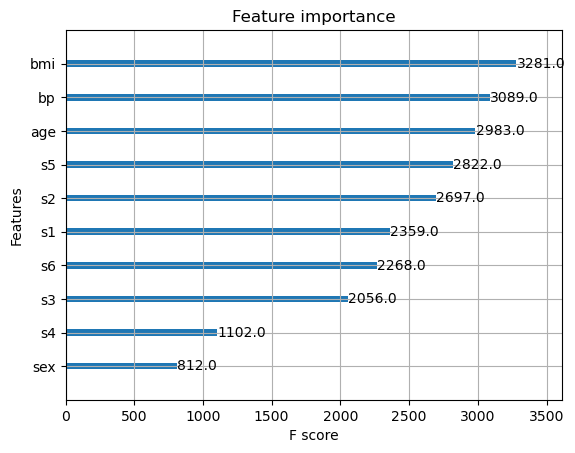

In [20]:
# Plot the importance of the features based on fitted trees
xgb.plot_importance(bst)